<h1>Fragen</h1>
<h2>Helfen Ampeln bei der Reduktion von Abbiege und Kreuzungsunfällen?</h2>
1. Welche Informationen sind notwendig, um diese Frage beantworten zu können? <br/>
Abgrenzung Abbiege und Kreuzungsunfälle?<br/>
Unfalltyp (technisch UTYP1 )<br/>
2 = Abbiegeunfall<br/>
3 = Einbiegen / Kreuzen-Unfall<br/>
NAHE_AMPEL <br/>
0 = False <br/>
1 = True <br/>

2. Woran erkenne ich, ob/in welchem Maß die Ampel geholfen hat? <br/>
Durchschnittliche Anzahl an Unfällen um eine Ampel rum im Vergleich zu Kreuzungen, an denen es keine Ampel gab (Visuelle Erkenntnis) <br/>
Warum keine analytische Erkenntnis? --> Notwendige Daten fehlen, um das vergleichen zu können müsste, aber mithilfe von Clustering könnte eine Gruppenbildung vorgenommen werden<br/>
Verkehrsmenge auf Straßenabschnitten <br/>
Verkehrsmenge auf Straßenabschnitten ggf. Kategorisierung in hohes Verehrsaufkommen, mittleres, niedriges  <br/>
Vergleich von Bezirken Anzahl Ampeln je durchschnittliche Verkehrsmenge <br/>
Tempolimits einbringen <br/>

## 1. Vorbereitung des Datensatzes

### 1.1 Generelles Aufbereiten der Datenbasis

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
crash_data = gpd.read_file('../01_Source/consolidatedDataSet.geojson') 

In [2]:
crash_data.head()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND,LINREFX,LINREFY,METER,STR_NAME,DTV,HERKUNFT,NAME,KNAME,PLR_NAME,EW2010,VBUS,VBUS_PERS,GESLAERM,GESLAERM_PERS,GEMEINDE,BEZIRK,ANWERT,BRW,NUTZUNG,GFZ,VERFAHRENSART,STICHTAG,BEITRAGSZUSTAND,LUMNUM,ELEM_NR,VRICHT_TXT,WERT_VES,ZEIT_T,TAG_T,DURCH_T,DANN_T,DAT_T,LAT,LON,formatted_address,address_components,postal_code,sublocality,street_number,route,TARGET,UART_Value,UWOCHENTAG_Value,ULICHTVERH_Value,UTYP1_Value,STRZUSTAND_Value,ANTEIL_PKW,ANTEIL_LKW,ANTEIL_LIEFERWAGEN,ANTEIL_LINIENBUSSE,ANTEIL_REISEBUSSE,ANTEIL_KRAD,UKREIS_AVG_TARGET,UGEMEINDE_AVG_TARGET,CRASH_BY_DTV,FATAL_CRASH_BY_DTV,Indicator,geometry
0,198728,11,0,10,10,2018,3,11,5,5,3,0,0,1,0,0,0,0,0,814987.3095,5.829184e+06,212.232355,Schongauerstraße,19575.767816,None,None,None,Mahlsdorf Nord,8818.0,mittel,niedrig - sehr niedrig,mittel,niedrig - sehr niedrig,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62540035_62540036.02,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,52.521509,13.643731,"Schongauerstraße 20, 12623 Berlin, Germany","[ { ""long_name"": ""20"", ""short_name"": ""20"", ""ty...",12623.0,Bezirk Marzahn-Hellersdorf,20,Schongauerstraße,0,Zusammenstoß mit einbiegendem / kreuzendem Fah...,Donnerstag,Tageslicht,Einbiegen / Kreuzen-Unfall,trocken,82.408776,2.762958,2.762958,2.762958,0.400124,2.494525,21.266234,21.266234,5.108,0.000,0.029628,"MULTIPOLYGON (((814997.310 5829184.012, 814996..."
1,196865,11,0,10,10,2018,1,18,2,5,3,2,0,1,0,0,0,0,0,814875.2039,5.830058e+06,220.000000,Lemkestr.,6108.000000,"Modellrechnung 2014, VMZ",None,None,Mahlsdorf Nord,8818.0,mittel,niedrig - sehr niedrig,mittel,niedrig - sehr niedrig,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62550001_62550021.01,beide Richtungen,30.0,07:00 - 17:00,Montag bis Freitag,Kinder,Zeitangabe,None,52.529404,13.642912,"Lemkestraße 112B, 12623 Berlin, Germany","[ { ""long_name"": ""112B"", ""short_name"": ""112B"",...",12623.0,Bezirk Marzahn-Hellersdorf,112B,Lemkestraße,0,Zusammenstoß mit einbiegendem / kreuzendem Fah...,Montag,Dunkelheit,Einbiegen / Kreuzen-Unfall,trocken,81.777996,3.601834,10.216110,2.619515,0.261952,1.522593,21.266234,21.266234,153.846,51.282,0.148718,"MULTIPOLYGON (((814885.204 5830057.780, 814884..."
2,202456,11,0,10,10,2018,6,7,4,5,3,0,1,1,0,0,0,0,0,814271.9549,5.828041e+06,212.232355,Lortzingstraße,19575.767816,None,None,None,Alt-Mahlsdorf,3852.0,niedrig - sehr niedrig,niedrig - sehr niedrig,niedrig - sehr niedrig,mittel,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62530003_62540023.02,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,52.511678,13.632143,"Lortzingstraße 22, 12623 Berlin, Germany","[ { ""long_name"": ""22"", ""short_name"": ""22"", ""ty...",12623.0,Bezirk Marzahn-Hellersdorf,22,Lortzingstraße,1,Zusammenstoß mit einbiegendem / kreuzendem Fah...,Mittwoch,Tageslicht,Einbiegen / Kreuzen-Unfall,trocken,82.408776,2.762958,2.762958,2.762958,0.400124,2.494525,21.266234,21.266234,10.217,5.108,0.029628,"MULTIPOLYGON (((814281.955 5828040.742, 814281..."
3,201726,11,0,10,10,2018,6,13,4,5,3,0,0,1,0,0,1,0,0,814205.0080,5.830068e+06,212.232355,Am Schlehdorn,19575.767816,None,None,None,Mahlsdorf Nord,8818.0,mittel,niedrig - sehr niedrig,mittel,niedrig - sehr niedrig,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62550008_62550009.03,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,52.529883,13.633075,"Am Schlehdorn 24, 12623 Berlin, Germany","[ { ""long_name"": ""24"", ""short_name"": ""24"", ""ty...",12623.0,Bezirk Marzahn-Hellersdorf,24,Am Schlehdorn,0,Zusammenstoß mit einbiegendem / kreuze

In [3]:
affected_crash_data = crash_data[((crash_data['UTYP1'] == 2) | (crash_data['UTYP1'] == 3))]

In [4]:
affected_crash_data.shape

(6163, 77)

In [5]:
# Feld Nahe Ampel erzeugen
affected_crash_data['NAHE_AMPEL'] = 0
affected_crash_data.loc[~affected_crash_data["KNAME"].isna(), ['NAHE_AMPEL']] = 1
affected_crash_data = affected_crash_data.drop(["NAME","KNAME","PLR_NAME"], axis=1)

affected_crash_data.loc[affected_crash_data['NAHE_AMPEL'] == 1].shape

/Users/haju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/haju/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(2949, 75)

### 1.2 Clustering zur Sicherstellung von Vergleichbarkeit (Ab jetzt in QGIS realisiert über DBSCAN)

In [6]:
#str(crash_data.iloc[0, :].geometry[ 0 ].centroid)
# 1. Loope über alle Crash Daten
# 2. Hole den Centroid aus dem 1. Polygon str(crash_data.iloc[0, :].geometry[ 0 ].centroid)
# 3. replace geometry with the point
#df_new = pd.DataFrame(columns = [])
#for index, row in crash_data.iterrows():
 #   print(index)
  #  row.geometry = row.geometry[ 0 ].centroid 
   # df_new = df_new.append(row, ignore_index=True)

In [7]:
#df_new.head()
#crash_data.to_file("../01_Source/crash_data_for_clustering.geojson", driver='GeoJSON')

### 1.3 Einlesen, der in QGIS ermittelten Cluster

In [8]:
cluster = pd.read_csv("../01_Source/haeufung.csv",sep=';')
affected_crash_data = pd.merge(affected_crash_data, cluster, left_on=['OBJECTID'], right_on=['OBJECTID'],  how='inner')

affected_crash_data

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND,LINREFX,LINREFY,METER,STR_NAME,DTV,HERKUNFT,EW2010,VBUS,VBUS_PERS,GESLAERM,GESLAERM_PERS,GEMEINDE,BEZIRK,ANWERT,BRW,NUTZUNG,GFZ,VERFAHRENSART,STICHTAG,BEITRAGSZUSTAND,LUMNUM,ELEM_NR,VRICHT_TXT,WERT_VES,ZEIT_T,TAG_T,DURCH_T,DANN_T,DAT_T,LAT,LON,formatted_address,address_components,postal_code,sublocality,street_number,route,TARGET,UART_Value,UWOCHENTAG_Value,ULICHTVERH_Value,UTYP1_Value,STRZUSTAND_Value,ANTEIL_PKW,ANTEIL_LKW,ANTEIL_LIEFERWAGEN,ANTEIL_LINIENBUSSE,ANTEIL_REISEBUSSE,ANTEIL_KRAD,UKREIS_AVG_TARGET,UGEMEINDE_AVG_TARGET,CRASH_BY_DTV,FATAL_CRASH_BY_DTV,Indicator,geometry,NAHE_AMPEL,CLUSTER_ID
0,198728,11,0,10,10,2018,3,11,5,5,3,0,0,1,0,0,0,0,0,814987.3095,5.829184e+06,212.232355,Schongauerstraße,19575.767816,None,8818.0,mittel,niedrig - sehr niedrig,mittel,niedrig - sehr niedrig,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62540035_62540036.02,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,52.521509,13.643731,"Schongauerstraße 20, 12623 Berlin, Germany","[ { ""long_name"": ""20"", ""short_name"": ""20"", ""ty...",12623.0,Bezirk Marzahn-Hellersdorf,20,Schongauerstraße,0,Zusammenstoß mit einbiegendem / kreuzendem Fah...,Donnerstag,Tageslicht,Einbiegen / Kreuzen-Unfall,trocken,82.408776,2.762958,2.762958,2.762958,0.400124,2.494525,21.266234,21.266234,5.108,0.000,0.029628,"MULTIPOLYGON (((814997.310 5829184.012, 814996...",0,1
1,196865,11,0,10,10,2018,1,18,2,5,3,2,0,1,0,0,0,0,0,814875.2039,5.830058e+06,220.000000,Lemkestr.,6108.000000,"Modellrechnung 2014, VMZ",8818.0,mittel,niedrig - sehr niedrig,mittel,niedrig - sehr niedrig,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62550001_62550021.01,beide Richtungen,30.0,07:00 - 17:00,Montag bis Freitag,Kinder,Zeitangabe,None,52.529404,13.642912,"Lemkestraße 112B, 12623 Berlin, Germany","[ { ""long_name"": ""112B"", ""short_name"": ""112B"",...",12623.0,Bezirk Marzahn-Hellersdorf,112B,Lemkestraße,0,Zusammenstoß mit einbiegendem / kreuzendem Fah...,Montag,Dunkelheit,Einbiegen / Kreuzen-Unfall,trocken,81.777996,3.601834,10.216110,2.619515,0.261952,1.522593,21.266234,21.266234,153.846,51.282,0.148718,"MULTIPOLYGON (((814885.204 5830057.780, 814884...",0,2
2,202456,11,0,10,10,2018,6,7,4,5,3,0,1,1,0,0,0,0,0,814271.9549,5.828041e+06,212.232355,Lortzingstraße,19575.767816,None,3852.0,niedrig - sehr niedrig,niedrig - sehr niedrig,niedrig - sehr niedrig,mittel,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62530003_62540023.02,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,52.511678,13.632143,"Lortzingstraße 22, 12623 Berlin, Germany","[ { ""long_name"": ""22"", ""short_name"": ""22"", ""ty...",12623.0,Bezirk Marzahn-Hellersdorf,22,Lortzingstraße,1,Zusammenstoß mit einbiegendem / kreuzendem Fah...,Mittwoch,Tageslicht,Einbiegen / Kreuzen-Unfall,trocken,82.408776,2.762958,2.762958,2.762958,0.400124,2.494525,21.266234,21.266234,10.217,5.108,0.029628,"MULTIPOLYGON (((814281.955 5828040.742, 814281...",0,3
3,201726,11,0,10,10,2018,6,13,4,5,3,0,0,1,0,0,1,0,0,814205.0080,5.830068e+06,212.232355,Am Schlehdorn,19575.767816,None,8818.0,mittel,niedrig - sehr niedrig,mittel,niedrig - sehr niedrig,Berlin,Marzahn-Hellersdorf,None,360,W - Wohngebiet,0.4,None,2019-01-01T00:00:00,Beitragsfrei nach BauGB,[[url]],62550008_62550009.03,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,52.529883,13.633075,"Am Schlehdorn 24, 12623 Berlin, Germany","[ { ""long_name"": ""24"", ""short_name"": ""24"", ""ty...",12623.0,Bezirk Marzahn-Hellersdorf,24,Am Schlehdorn,0,Zusammenstoß mit einbiegendem / kreuzendem Fah...,Mittwoch,Tageslicht,Einbiegen / Kreuzen-Unfall,trocken,82.408776,2.762958

In [9]:
#Save Dataset
affected_crash_data.to_file("../01_Source/qgis_show.geojson", driver='GeoJSON')

In [10]:
affected_crash_data['OBJECTID'].shape

(6163,)

## 2 Betrachtung der Daten

In [11]:
crashes_near_traffic_light = affected_crash_data[ affected_crash_data['NAHE_AMPEL'] == 1 ]
crashes_near_traffic_light['OBJECTID'].shape

(2949,)

In [12]:
crashes_without_traffic_light = affected_crash_data[affected_crash_data['NAHE_AMPEL'] == 0]
crashes_without_traffic_light['OBJECTID'].shape

(3214,)

In [13]:
#Durchschnittliche Anzahl an Unfällen an einer Kreuzung/Abbiegung mit Ampel
cnt_crtl = crashes_near_traffic_light.groupby('CLUSTER_ID')[['OBJECTID']].count()
cnt_crtl.rename(columns=lambda x: 'Cnt' + x, inplace=True)
cnt_crtl['CntOBJECTID'].mean()

2.2256603773584906

In [14]:
#Prüfung bei Entfernung der Kreuzungen und Abbiegungen mit einem Unfall
cnt_crtl = cnt_crtl[cnt_crtl['CntOBJECTID'] > 1]
cnt_crtl['CntOBJECTID'].mean()

3.5217391304347827

In [15]:
# Macht es eventuell Sinn Orte an denen es nur einen Unfall gab rauszuwerfen
cnt_crtl['CntOBJECTID'].value_counts()

2     280
3     136
4      83
5      56
6      37
7      20
8       9
9       8
11      4
10      4
13      2
12      2
17      1
16      1
15      1
Name: CntOBJECTID, dtype: int64

In [16]:
#Durchschnittliche Anzahl an Unfällen an einer Kreuzung/Abbiegung ohne Ampel
cnt_cwtl = crashes_without_traffic_light.groupby('CLUSTER_ID')[['OBJECTID']].count()
cnt_cwtl.rename(columns=lambda x: 'Cnt' + x, inplace=True)
cnt_cwtl['CntOBJECTID'].mean()

1.3770351328191945

In [17]:
cnt_cwtl['CntOBJECTID'].value_counts()

1     1817
2      337
3       88
4       47
5       24
6       14
11       2
7        2
9        1
14       1
8        1
Name: CntOBJECTID, dtype: int64

In [18]:
#Prüfung bei Entfernung der Kreuzungen und Abbiegungen mit einem Unfall
cnt_cwtl = cnt_cwtl[cnt_cwtl['CntOBJECTID'] > 1]
cnt_cwtl['CntOBJECTID'].mean()

2.702127659574468

In einer einfachen Betrachtung scheint es zunächst so, dass eine Ampel mehr Abbiege- und Kreuzungsunfälle verursacht.

Die Verteilung der Anzahl von Unfällen scheint an dieser Stelle noch nicht geeignet, um zu prüfen, ob Ampeln bei der Reduktion von Unfällen helfen, da es auch seien könnte, dass es einfach viele Kreuzungen ohne Ampel gibt, die aufgrund diverser Features nicht so anfällig für Verkehrsunfälle sind.<br>

Zunächst ist zu beantworten: Welche Features machen einen Ort/Spot besonders gefährlich/prädestiniert für Unfälle und wie könnte dies in Form eines Indizes abgebildet werden: <br>

1. Wie finde ich das heraus?<br>
Als vereinfachte Kennzahl wird im Folgenden das Feature indicator verwendet, welches den relativen Anteil eines Unfalls an der Verkehrsmenge auf der jeweiligen Straße beschreibt




In [19]:
#Durchschnittliche Summe der relativen Anteile an Unfällen je Verkehrsmenge an Kreuzungen/Abbiegungen mit Ampel
sumInd_crtl = crashes_near_traffic_light.groupby('CLUSTER_ID')[['Indicator']].sum()
sumInd_crtl.rename(columns=lambda x: 'Sum' + x, inplace=True)
sumInd_crtl['SumIndicator'].mean()

0.1413235596737145

In [20]:
#Prüfung bei Entfernung der Kreuzungen und Abbiegungen mit einem Unfall
sumInd_crtl = pd.merge(sumInd_crtl, cnt_crtl, left_on=['CLUSTER_ID'], right_on=['CLUSTER_ID'],  how='inner')
sumInd_crtl['SumIndicator'].mean()

0.23750710699098065

In [21]:
#Durchschnittliche Summe der relativen Anteile an Unfällen je Verkehrsmenge an Kreuzungen/Abbiegungen ohne Ampel
sumInd_cwtl = crashes_without_traffic_light.groupby('CLUSTER_ID')[['Indicator']].sum()
sumInd_cwtl.rename(columns=lambda x: 'Sum' + x, inplace=True)
sumInd_cwtl['SumIndicator'].mean()

0.08550607096158074

In [22]:
#Prüfung bei Entfernung der Kreuzungen und Abbiegungen mit einem Unfall
sumInd_cwtl = pd.merge(sumInd_cwtl, cnt_cwtl, left_on=['CLUSTER_ID'], right_on=['CLUSTER_ID'],  how='inner')
sumInd_cwtl['SumIndicator'].mean()

0.1437891623807575

Es scheint als würde das Bestehen von Ampel 

In [23]:
#Wo könnten ggf. Korrelationen existieren?
affected_crash_data_cnt = affected_crash_data.groupby('CLUSTER_ID')[['OBJECTID']].count()
affected_crash_data_cnt.rename(columns=lambda x: 'Cnt' + x, inplace=True)
affected_crash_data = pd.merge(affected_crash_data, affected_crash_data_cnt, left_on=['CLUSTER_ID'], right_on=['CLUSTER_ID'],  how='inner')
corr_matrix = affected_crash_data.corr()


In [24]:
from pandas.plotting import scatter_matrix
attributes = ["CntOBJECTID", "NAHE_AMPEL", "DTV","WERT_VES","UGEMEINDE"]
scatter_matrix(affected_crash_data[attributes], figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124d44eb8>,
      dtype=object)

In [25]:
corr_matrix[~corr_matrix["CntOBJECTID"].between(-0.1,0.1) ]["CntOBJECTID"]

OBJECTID               -0.118869
ULAND                        NaN
UREGBEZ                      NaN
UKREIS                 -0.214808
UGEMEINDE              -0.214808
UJAHR                        NaN
UTYP1                  -0.157132
DTV                     0.167915
GFZ                     0.219371
WERT_VES                0.190198
postal_code            -0.199929
ANTEIL_LIEFERWAGEN      0.191141
UKREIS_AVG_TARGET      -0.242359
UGEMEINDE_AVG_TARGET   -0.242359
NAHE_AMPEL              0.333660
CLUSTER_ID              0.152884
CntOBJECTID             1.000000
Name: CntOBJECTID, dtype: float64

In [26]:
#Einbeziehung weiterer Parameter
#Verkehrsmenge auf Straßenabschnitten <br/>
#Verkehrsmenge auf Straßenabschnitten ggf. Kategorisierung in hohes Verehrsaufkommen, mittleres, niedriges  <br/>
#Vergleich von Bezirken Anzahl Ampeln je durchschnittliche Verkehrsmenge <br/>
#Tempolimits einbringen <br/>

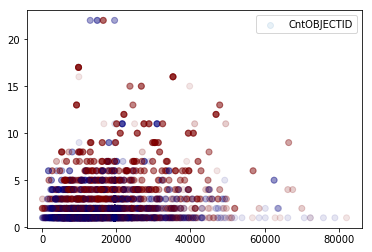

In [27]:
import matplotlib.pyplot as plt
plt.scatter(x=affected_crash_data["DTV"], y=affected_crash_data["CntOBJECTID"], c=affected_crash_data["NAHE_AMPEL"], alpha=0.1,cmap=plt.get_cmap("jet"))
plt.legend()

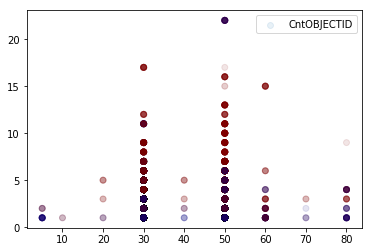

In [28]:
plt.scatter(x=affected_crash_data["WERT_VES"], y=affected_crash_data["CntOBJECTID"], c=affected_crash_data["NAHE_AMPEL"], alpha=0.1,cmap=plt.get_cmap("jet"))
plt.legend()


In [29]:
affected_crash_data_reduced = affected_crash_data[affected_crash_data['CntOBJECTID'] >= 2]
affected_crash_data_reduced['OBJECTID'].shape

(3700,)

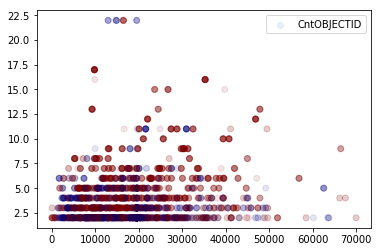

In [30]:
plt.scatter(x=affected_crash_data_reduced["DTV"], y=affected_crash_data_reduced["CntOBJECTID"], c=affected_crash_data_reduced["NAHE_AMPEL"], alpha=0.1,cmap=plt.get_cmap("jet"))
plt.legend()

In [31]:
affected_crash_data["DTV"].describe()

count     6163.000000
mean     17949.808258
std      10555.682423
min          0.000000
25%      10170.000000
50%      17370.000000
75%      22050.000000
max      82082.000000
Name: DTV, dtype: float64

In [32]:
affected_crash_data['DTV_GROUP'] = np.where(affected_crash_data['DTV'] < 9360, 1, np.where(affected_crash_data['DTV'] < 15300, 2, np.where(affected_crash_data['DTV'] < 24007, 3, np.where(affected_crash_data['DTV'] < 82082, 4, 5))))

In [33]:
affected_crash_data['DTV_GROUP'].value_counts()

3    2147
2    1341
4    1340
1    1334
5       1
Name: DTV_GROUP, dtype: int64

In [34]:
affected_crash_data.to_file("../01_Source/frage1_tableau.geojson")